## PHYS 105A:  Introduction to Scientific Computing

# Numerical Integrator

In this assignment, we will see some of the limitations on numerical integrators, and find ways to improve them.

In [36]:
# Step 1. Import Libraries

import numpy as np
from matplotlib import pyplot as plt

In [37]:
# Step 2. Define standard numerical integrals
#
# There is nothing complicated that you need to do here.
# Simply copy and paste the functions in the lecture note from last week.

def trapezoidal(f, N=8, a=0, b=1):
    X, D = np.linspace(a, b, N+1, retstep=True)
    return np.sum(f(X[1:])+f(X[:-1])) * 0.5 * D

def Simpson(f, N=8, a=0, b=1):
    X, D = np.linspace(a, b, N+1, retstep=True)
    S = 0
    for i in range(N//2):
        l = X[2*i]
        m = X[2*i+1]
        r = X[2*i+2]
        S += D * (f(l) + 4*f(m) + f(r)) / 3
    return S


def Bode(f, N=8, a=0, b=1):
    X, D = np.linspace(a, b, N+1, retstep=True)
    S = 0
    for i in range(N//4):
        x0 = X[4*i]
        x1 = X[4*i+1]
        x2 = X[4*i+2]
        x3 = X[4*i+3]
        x4 = X[4*i+4]
        S += D * (14*f(x0) + 64*f(x1) + 24*f(x2) + 64*f(x3) + 14*f(x4)) / 45
    return S

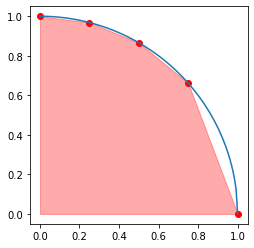

In [38]:
# Step 3. Define a function that breaks our integrators...
#
# Since we have worked on integrating pi for many times, let's define a quarter circle again!

def h(x):
    return np.sqrt(1 - x * x)

X = np.linspace(0, 1, 5)
Y = h(X)

x = np.linspace(0, 1, 129) # define a fine grid for plotting
plt.plot(x, h(x))
plt.scatter(X, Y, color='r')
plt.fill_between(X, h(X), color='r', alpha=0.33)
plt.gca().set_aspect('equal')

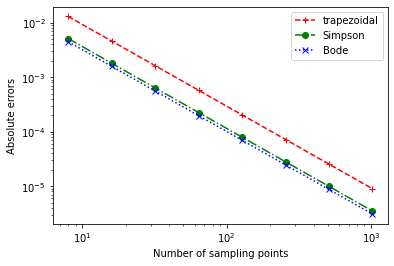

In [39]:
# Step 4. Apply the integrators

Ns = [8, 16, 32, 64, 128, 256, 512, 1024]

err_t = [abs(trapezoidal(h, N) - np.pi/4) for N in Ns]
err_S = [abs(Simpson(h, N)     - np.pi/4) for N in Ns]
err_B = [abs(Bode(h, N)        - np.pi/4) for N in Ns]

plt.loglog(Ns, err_t, '+--', color='r', label='trapezoidal')
plt.loglog(Ns, err_S, 'o-.', color='g', label='Simpson')
plt.loglog(Ns, err_B, 'x:',  color='b', label='Bode')
plt.xlabel('Number of sampling points')
plt.ylabel('Absolute errors')
plt.legend()

`ANS`: Yes this is expected as the formula tests itself to get the smallest margin of error so the graph above is correct for the current formula. The margin of error gets smaller as the line goes to the right for all functions, however the simpson and bode would have better answers since their margin of errors are the smallest. The convergence rate for Trapezoidal = 10^-2-N^-2, Simpson and Bode Bode have the same slope and start lower than the trapezoidal so their convergance rate is something like 10^-2.5-N^-2.

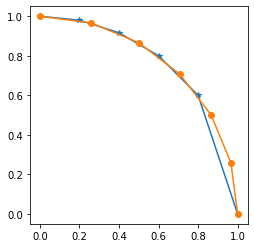

In [40]:
# Step 5. Idea: use smaller steps as we apporach one.
#
# We don't have to rewrite the integrators from scratch.
# We can reduce the functions we implemented above.
# See trapezoidal_adaptive() as an example.

# X are our collocation points. So far, we have worked
# with uniformly distributed ones, but we can choose
# another distribution, e.g., sinuisoidal. Have a look
# at how the new points look much smoother.

N=6
X_unif = np.linspace(0, 1, N)
X_sin = np.sin(np.pi/2 * np.arange(N+1)/N)
plt.plot(X_unif, h(X_unif), marker="*")
plt.plot(X_sin, h(X_sin), marker="o")
plt.gca().set_aspect('equal')

# We can implement this in our integrators

def trapezoidal_adaptive(h, N):
    X = np.sin(np.pi/2 * np.arange(N+1)/N)
    S = 0
    for i in range(N):
        S += trapezoidal(h, N=1, a=X[i], b=X[i+1])
    return S

def Simpson_adaptive(h, N):
    N = N//2
    X = np.sin(np.pi/2 * np.arange(N+1)/N)
    S = 0
    for i in range(N):
        S += Simpson(h, N=2, a=X[i], b=X[i+1])
    return S
    
def Bode_adaptive(h, N):
    N = N//4
    X = np.sin(np.pi/2 * np.arange(N+1)/N)
    S = 0
    for i in range(N):
        S += Bode(h, N=4, a=X[i], b=X[i+1])
    return S

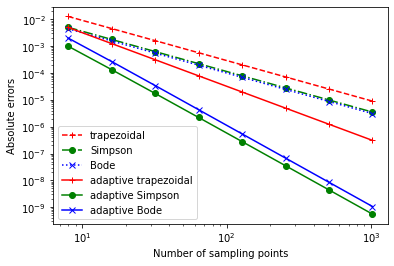

In [41]:
# Step 6. Test the result

Ns = [8, 16, 32, 64, 128, 256, 512, 1024]

err_ta = [abs(trapezoidal_adaptive(h, N) - np.pi/4) for N in Ns]
err_Sa = [abs(Simpson_adaptive(h, N)     - np.pi/4) for N in Ns]
err_Ba = [abs(Bode_adaptive(h, N)        - np.pi/4) for N in Ns]

plt.loglog(Ns, err_t,  '+--', color='r', label='trapezoidal')
plt.loglog(Ns, err_S,  'o-.', color='g', label='Simpson')
plt.loglog(Ns, err_B,  'x:',  color='b', label='Bode')
plt.loglog(Ns, err_ta, '+-',  color='r', label='adaptive trapezoidal')
plt.loglog(Ns, err_Sa, 'o-',  color='g', label='adaptive Simpson')
plt.loglog(Ns, err_Ba, 'x-',  color='b', label='adaptive Bode')
plt.xlabel('Number of sampling points')
plt.ylabel('Absolute errors')
plt.legend()

What is the convergent rate?  Is this expected?  Please write down your answers below.

`ANS`: Yes this is expected. The new bold lines are represent the updated formulas which will give as a smaller margin of error and a more accurate answer which is shown in the graph above. the new convergence lines are different as tehy now have steeper slopes which give better answers since the margin of error is now even smaller. The trapezoidal would be around 10^-2.5-N^-2.5 or something close since it started in the same place as the old simpson and bode lines and also has a slightly steeper slope than them. the simpson would be something around 10^-3-N^-3 and the bode would be the same just with a slightly lower starting point.

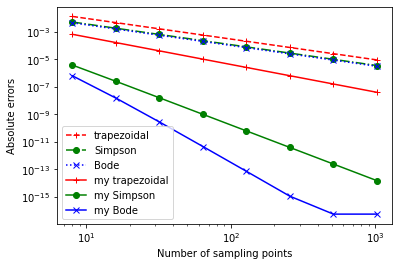

In [42]:
# Step 7. Come up with some other idea to improve the convergent rate.
#
# One possibility, take advantage of the symmetry of the circle.
# What if we integrate 1/8 of a circle instead?
#
# Please implement the integrations and make the convergence plots.

def h(x):
    return (np.sqrt(1 - x * x)-x)

Ns = [8, 16, 32, 64, 128, 256, 512, 1024]

err_tb = [abs(trapezoidal(h, N, 0, 1/np.sqrt(2)) - np.pi / 8) for N in Ns]
err_Sb = [abs(Simpson(h, N, 0, 1/np.sqrt(2))     - np.pi / 8) for N in Ns]
err_Bb = [abs(Bode(h, N, 0, 1/np.sqrt(2))        - np.pi / 8) for N in Ns]

plt.loglog(Ns, err_t,  '+--', color='r', label='trapezoidal')
plt.loglog(Ns, err_S,  'o-.', color='g', label='Simpson')
plt.loglog(Ns, err_B,  'x:',  color='b', label='Bode')
plt.loglog(Ns, err_tb, '+-',  color='r', label='my trapezoidal')
plt.loglog(Ns, err_Sb, 'o-',  color='g', label='my Simpson')
plt.loglog(Ns, err_Bb, 'x-',  color='b', label='my Bode')
plt.xlabel('Number of sampling points')
plt.ylabel('Absolute errors')
plt.legend()

`ANS`: there was indeed a new function and this graph was expected since it gives better margin of error than the previous two. the convergence rate for the bode and simpson are better and so is the trapezoidal however the trapezoidal is not as great as the other two so the answers aren't as great as seen in the graph above.the trapezoidal has the same rate just a lower starting point so it is something like 10^-3-N^-2.5. the simpson one is around 10^-5-N^-3.5. Finally the bode would be something like 10^-7-N^-4 while is evens out at a slope of o at around y = 10^-15.